In [1]:
import json
import pathlib
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib as mpl
import cv2

{'classname': 'bed', 'bbox': [1.7725752508361206, 168.17558528428094, 466.1872909698997, 357.3929765886288]}
{'classname': 'night_stand', 'bbox': [421, 299, 168, 96]}
{'classname': 'dresser', 'bbox': [142.6923076923077, 186.89270598846159, 175.96800280351172, 61.26782912859528]}
{'classname': 'lamp', 'bbox': [475.05016722408027, 144, 93.94983277591973, 167.08695652173913]}
{'classname': 'pillow', 'bbox': [287.1571906354515, 226.88963210702343, 121.42140468227427, 44.31438127090297]}
{'classname': 'chair', 'bbox': [381.98996655518397, 379.33110367892976, 107.24080267558526, 138.26086956521743]}
{'classname': 'dresser', 'bbox': [69.1304347826087, 121.42140468227426, 123.19397993311036, 121.42140468227426]}
{'classname': 'chair', 'bbox': [35.45150501672241, 148.8963210702341, 39.88294314381271, 70.90301003344482]}


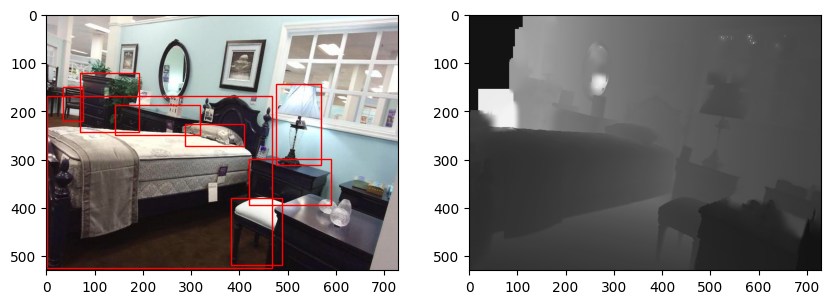

In [4]:
import pathlib
import json

ROOT = pathlib.Path('C:\\Users\\Archana Jayaraman\\Downloads\\archive (4)\\MYSUN')

with open(ROOT/'info.json') as f:
    infos = json.load(f)

info = infos[17]
annos = info['annotations']
rgb = cv2.imread(str(ROOT/info['image']))
dpt = cv2.imread(str(ROOT/info['depth_bfx']))

plt.figure(figsize=(10,10))
ax = plt.subplot(121)
for anno in annos:
    print(anno)
    c = anno['classname']
    x0, y0, w, h = anno['bbox']
    rect = Rectangle(
        [x0, y0], w, h,
        facecolor='none',
        edgecolor='r'
    )
    ax.add_patch(rect)
ax.imshow(rgb)

plt.subplot(122)
plt.imshow(dpt)
plt.show()


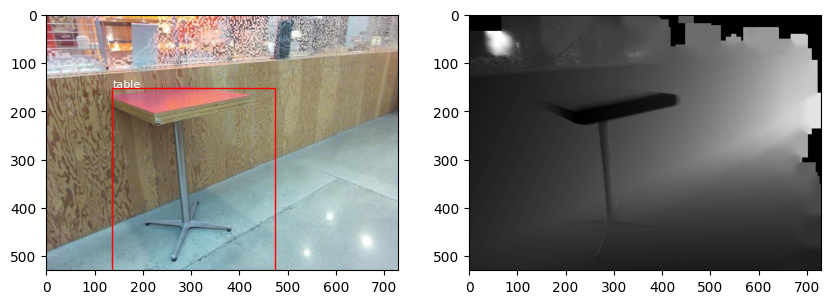

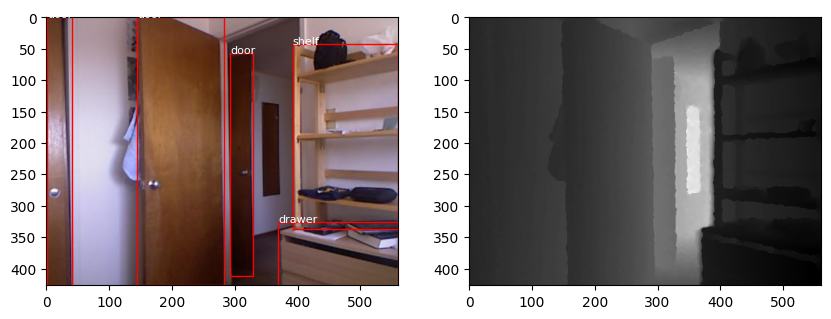

In [7]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import pathlib
import json
import random

# Define the root path to the dataset
ROOT = pathlib.Path('C:\\Users\\Archana Jayaraman\\Downloads\\archive (4)\\MYSUN')

# Load the JSON file with annotations
with open(ROOT / 'info.json') as f:
    infos = json.load(f)

# Function to display an image with its annotations
def display_image_with_annotations(info):
    rgb_path = ROOT / info['image']
    depth_path = ROOT / info['depth_bfx']
    
    # Read images using OpenCV
    rgb = cv2.cvtColor(cv2.imread(str(rgb_path)), cv2.COLOR_BGR2RGB)
    depth = cv2.imread(str(depth_path), cv2.IMREAD_UNCHANGED)

    # Create a figure
    plt.figure(figsize=(10, 5))

    # Display RGB image with annotations
    ax = plt.subplot(121)
    ax.imshow(rgb)
    for anno in info['annotations']:
        c = anno['classname']
        x0, y0, w, h = anno['bbox']
        rect = Rectangle([x0, y0], w, h, facecolor='none', edgecolor='r')
        ax.add_patch(rect)
        plt.text(x0, y0, c, color='white', fontsize=8)
    
    # Display depth image
    plt.subplot(122)
    plt.imshow(depth, cmap='gray')

    plt.show()

# Display images with annotations for random samples
num_samples = 2
random_samples = random.sample(infos, num_samples)

for info in random_samples:
    display_image_with_annotations(info)


In [1]:
import open3d as o3d
import numpy as np
import os
import random

def load_point_cloud_from_txt(file_path):
    # Load the point cloud data from a text file
    data = np.loadtxt(file_path)
    # Assuming the data consists of x, y, z coordinates
    points = data[:, :3]
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(points)
    return pcd

def visualize_pcd(pcd):
    o3d.visualization.draw_geometries([pcd])

# Directory path containing the point cloud .txt files
txt_folder_path = 'C:\\Users\\Archana Jayaraman\\Downloads\\kitti-20240111T001659Z-001\\kitti\\cars'  # Update if necessary

# Ensure the path is a directory
if not os.path.isdir(txt_folder_path):
    print(f"The provided path is not a directory: {txt_folder_path}")
else:
    # List all .txt files in the directory
    txt_files = [f for f in os.listdir(txt_folder_path) if f.endswith('.txt')]

    # Number of point clouds to visualize
    num_samples = min(3, len(txt_files))

    # Select a few random .txt files
    random_txt_files = random.sample(txt_files, num_samples)

    # Visualize the selected point clouds
    for file_name in random_txt_files:
        print("Visualizing:", file_name)
        file_path = os.path.join(txt_folder_path, file_name)
        pcd = load_point_cloud_from_txt(file_path)
        visualize_pcd(pcd)


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


Number of classes (subdirectories): 8
Visualizing PLY file: 8243278b0b5881fd41ee82033240ca28__0__.ply


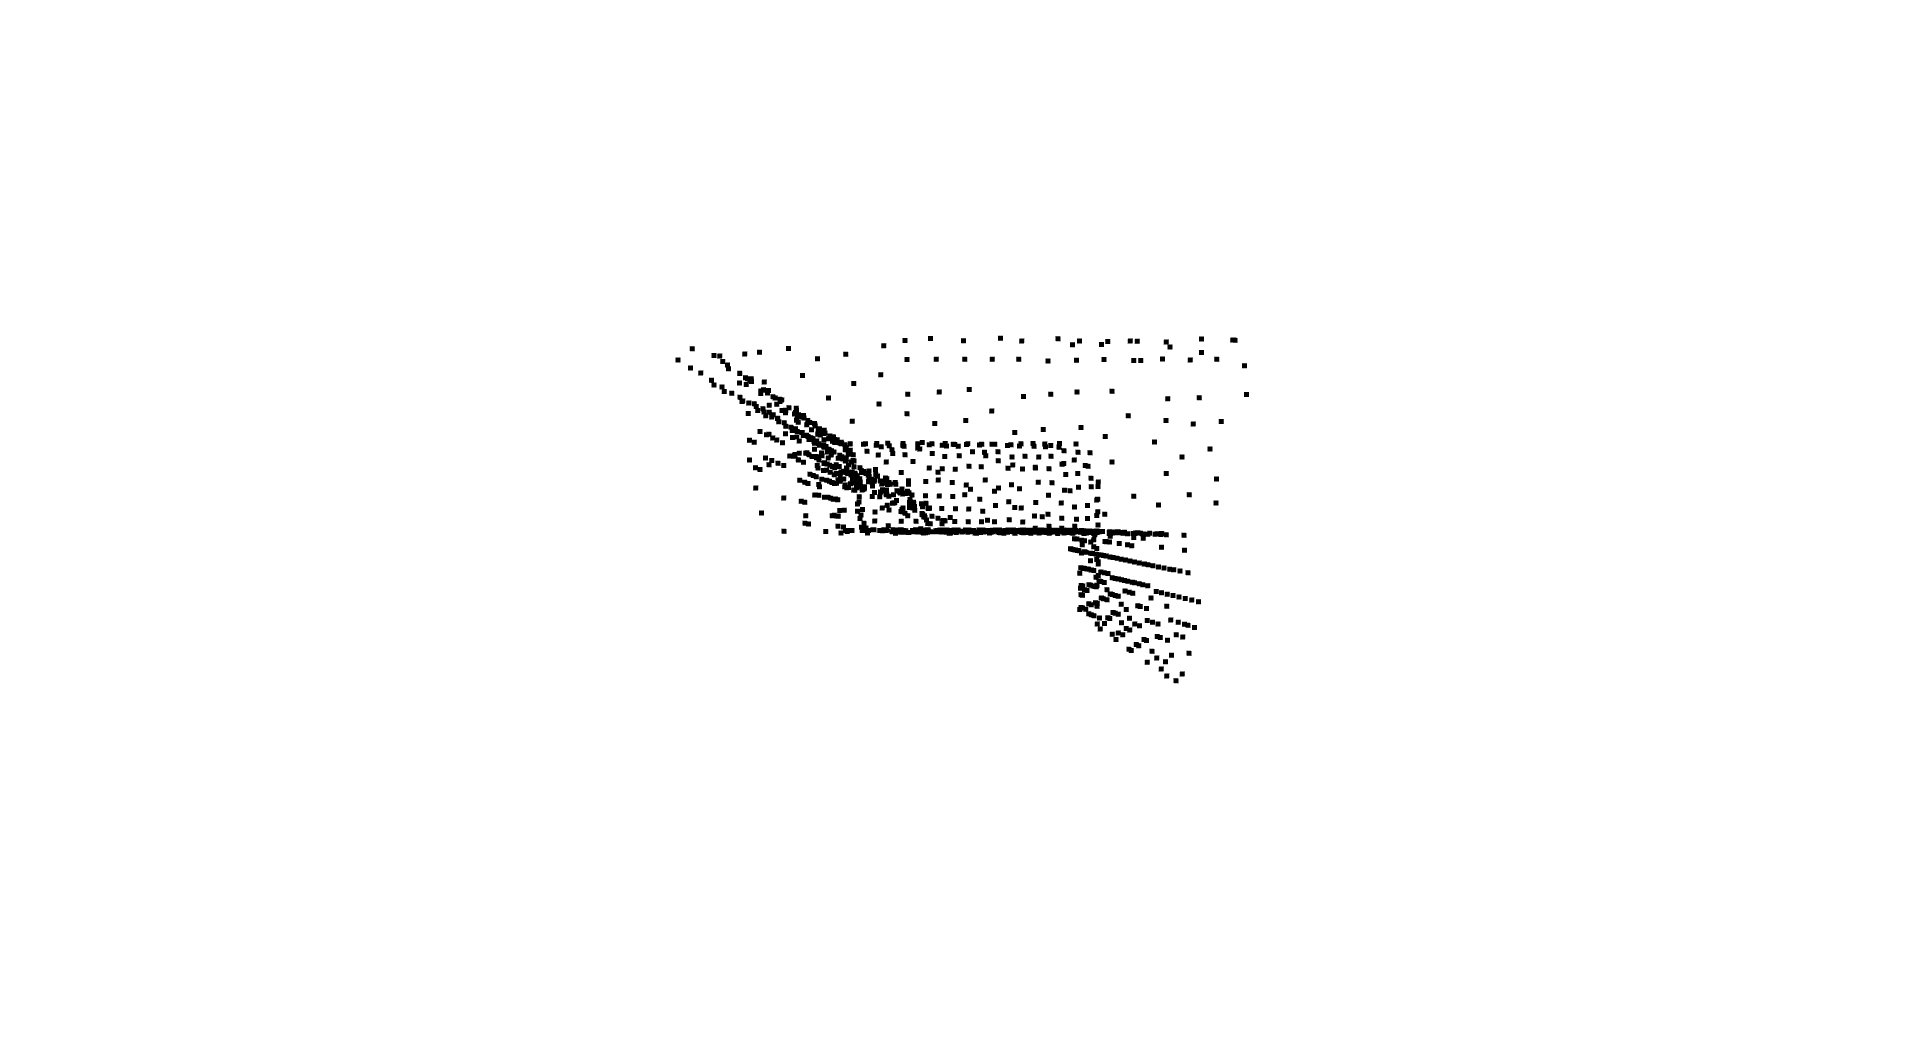

In [2]:
import open3d as o3d
import os
import random
from IPython.display import Image, display

def visualize_and_save_point_cloud(file_path, save_path):
    pcd = o3d.io.read_point_cloud(file_path)
    if pcd.is_empty():
        print(f"Failed to load point cloud from {file_path}")
    else:
        # Visualize and save the render as an image
        vis = o3d.visualization.Visualizer()
        vis.create_window(visible=False)  # Create a window that is not displayed
        vis.add_geometry(pcd)
        vis.update_geometry(pcd)
        vis.poll_events()
        vis.update_renderer()
        vis.capture_screen_image(save_path)
        vis.destroy_window()

# Root directory of the dataset
root_dir = "C:\\Users\\Archana Jayaraman\\Final_Project\\point-e\\3depn_generated\\shapenet_dim32_sdf_pc"

# List all subdirectories
subdirectories = [d for d in os.listdir(root_dir) if os.path.isdir(os.path.join(root_dir, d))]
print("Number of classes (subdirectories):", len(subdirectories))

# Randomly pick a class
random_class = random.choice(subdirectories)
class_dir = os.path.join(root_dir, random_class)

# List all .ply files in the class directory
ply_files = [f for f in os.listdir(class_dir) if f.endswith('.ply')]

# Randomly pick a .ply file
if ply_files:
    random_ply_file = random.choice(ply_files)
    ply_file_path = os.path.join(class_dir, random_ply_file)
    print("Visualizing PLY file:", random_ply_file)

    # Save visualization as an image
    image_path = os.path.join(class_dir, "temp_visualization.png")
    visualize_and_save_point_cloud(ply_file_path, image_path)
    
    # Display the saved image
    display(Image(filename=image_path))
else:
    print("No PLY files found in the selected class directory.")


In [3]:
import os

# Function to extract .bil files from a directory
def extract_bil_files(directory):
    bil_files = []
    for filename in os.listdir(directory):
        if filename.endswith(".bin"):
            bil_files.append(os.path.join(directory, filename))
    return bil_files

# Specify the paths to the training and testing directories
training_dir = r'C:\\Users\\Archana Jayaraman\\Downloads\\data_object_velodyne\\training\\velodyne'
testing_dir = r'C:\\Users\\Archana Jayaraman\\Downloads\\data_object_velodyne\\testing\\velodyne'

# Extract .bil files from training and testing directories
training_bil_files = extract_bil_files(training_dir)
testing_bil_files = extract_bil_files(testing_dir)

# Print basic attributes
print("Number of .bin files in the training directory:", len(training_bil_files))
print("Number of .bin files in the testing directory:", len(testing_bil_files))


Number of .bin files in the training directory: 7481
Number of .bin files in the testing directory: 7518


In [5]:
import os
import random
import open3d as o3d
import numpy as np

# Function to extract .bin files from a directory
def extract_bin_files(directory):
    bin_files = []
    for filename in os.listdir(directory):
        if filename.endswith(".bin"):
            bin_files.append(os.path.join(directory, filename))
    return bin_files

# Specify the path to the training directory
training_dir = r'C:\\Users\\Archana Jayaraman\\Downloads\\data_object_velodyne\\training\\velodyne'

# Extract .bin files from the training directory
training_bin_files = extract_bin_files(training_dir)

# Function to randomly open and visualize .bin images
def open_random_images(file_list, num_images):
    random_files = random.sample(file_list, num_images)
    for file_path in random_files:
        data = np.fromfile(file_path, dtype=np.float32)
        points = data.reshape(-1, 4)  # Assuming each point has 4 float values (x, y, z, intensity)
        point_cloud = o3d.geometry.PointCloud()
        point_cloud.points = o3d.utility.Vector3dVector(points[:, :3])  # Use only x, y, and z values
        o3d.visualization.draw_geometries([point_cloud])

# Open and visualize 3 random images from the training directory
open_random_images(training_bin_files, num_images=3)


[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The handle is invalid. 
